In [1]:
import cv2
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('airfoil.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 20, 100)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

In [2]:
import cv2
import numpy as np
img_1 = np.zeros([128,128,1],dtype=np.uint8)
img_1.fill(255)
# or img[:] = 255
cv2.imshow('Single Channel Window', img_1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("background.jpg", img_1)

True

In [3]:
if len(cnts) > 0:
    # grab the largest contour, then draw a mask for the pill
    c = max(cnts, key=cv2.contourArea)
    mask = np.zeros(gray.shape, dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    # compute its bounding box of pill, then extract the ROI,
    # and apply the mask
    (x, y, w, h) = cv2.boundingRect(c)
    imageROI2 = image[y:y + h, x:x + w]
    maskROI = mask[y:y + h, x:x + w]
    imageROI = cv2.bitwise_and(imageROI2, imageROI2, mask=maskROI)

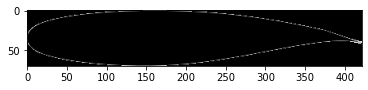

In [4]:
plt.imshow(imageROI)
#plt.axis("off");

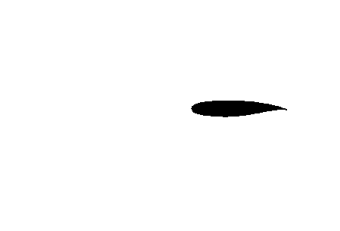

In [5]:
# Reading the image
im = cv2.imread('airfoil.jpg')
im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

cnt_scaled = scale_contour(contours[1], 0.3)

#cv2.drawContours(im2, contours, 1, (255, 0, 0), 3)
cv2.drawContours(im2, [cnt_scaled], 0, (0, 0, 0), -1)
plt.imshow(im2)
plt.axis("off");
plt.savefig('airfoil2.jpg', bbox_inches='tight', pad_inches=0.01)

##### TRIAL 1 WORKS BUT DOSEN'T VARY THE ANGLE OF ATTACK

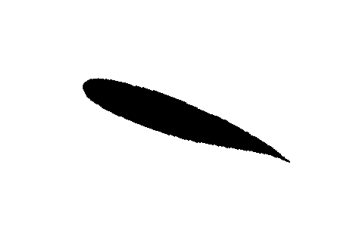

In [6]:
# Reading the image
im = cv2.imread('airfoil.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y


def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");

cnt_scaled = scale_contour(contours[1], 0.7)
cnt_rotated = rotate_contour(cnt_scaled, 20)
cnt_translated = cnt_rotated + (-80,10)
#cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
plt.imshow(im2)
plt.axis("off");
plt.savefig('airfoil3.jpg')

##### ATTEMPT TO VARY THE ANGLE OF ATTACK

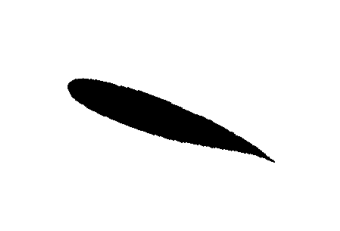

In [12]:
# Reading the image
im = cv2.imread('airfoil.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y


def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    plt.savefig('airfoils/airfoil' + str(i) + '.jpg')

## Kcwinglet-125

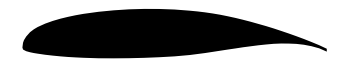

In [21]:
a = 'airfoils/kcwinglet-135/'
import pandas as pd
import numpy as np
df=pd.read_csv('airfoils/kcwinglet-135/kc135winglet.dat', sep='\s+',header=None)
x = np.array(df[0])
y = np.array(df[1])
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig(a + 'kcwinglet-135'+'.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

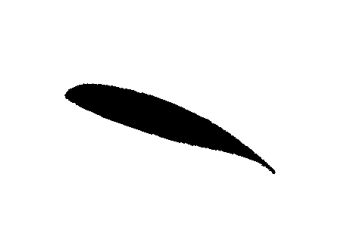

In [23]:
#varying angles of attack
# Reading the image
im = cv2.imread(a + 'kcwinglet-135.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y


def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    plt.savefig('airfoils/kcwinglet-135/AOA/kcwinglet-135' + '-AOA-' + str(i) + '.jpg')